In [1]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import time
import matplotlib.pyplot as plt

In [2]:
data = np.array([
    [1, 0.5, 1],
    [4, 2, 0],
    [2.5, 4, 0],
    [5, 0.8, 0],
    [0, 1.5, 1],
    [2.3, 4, 1],
    [5, 2, 0],
    [1.4, 3, 1],
    [1.2, 5.2, 1],
    [3.9, 4.6, 1]
])

X = data[:, :-1]
y = data[:, -1]

X = np.hstack([np.ones((X.shape[0], 1)), X])
w = np.array([0.1, 0.1, 0.1])

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def compute_gradient(X, y, y_pred):
    return -np.dot(X.T, (y - y_pred)) / X.shape[0]


In [4]:
# GD
gd_losses = []
gd_f1_scores = []
start_time = time.time()
for i in range(1000):
    y_pred = sigmoid(np.dot(X, w))
    gd_losses.append(binary_cross_entropy(y, y_pred))
    gradient = compute_gradient(X, y, y_pred)
    w -= 0.1 * gradient  # learning rate = 0.1
    y_pred_class = (y_pred > 0.5).astype(int)
    gd_f1_scores.append(f1_score(y, y_pred_class))
gd_duration = time.time() - start_time

# SGD
w = np.array([0.1, 0.1, 0.1])
sgd_losses = []
sgd_f1_scores = []
start_time = time.time()
for i in range(1000):
    for j in range(0, len(X), 2):  # batch size = 2
        X_batch = X[j:j+2]
        y_batch = y[j:j+2]
        y_pred = sigmoid(np.dot(X_batch, w))
        gradient = compute_gradient(X_batch, y_batch, y_pred)
        w -= 0.1 * gradient
    y_pred_full = sigmoid(np.dot(X, w))
    sgd_losses.append(binary_cross_entropy(y, y_pred_full))
    y_pred_class = (y_pred_full > 0.5).astype(int)
    sgd_f1_scores.append(f1_score(y, y_pred_class))
sgd_duration = time.time() - start_time

Time taken for GD: 0.33 seconds
Time taken for SGD: 0.36 seconds
F1 Score: 0.923076923076923
Confusion Matrix:
[[3 1]
 [0 6]]


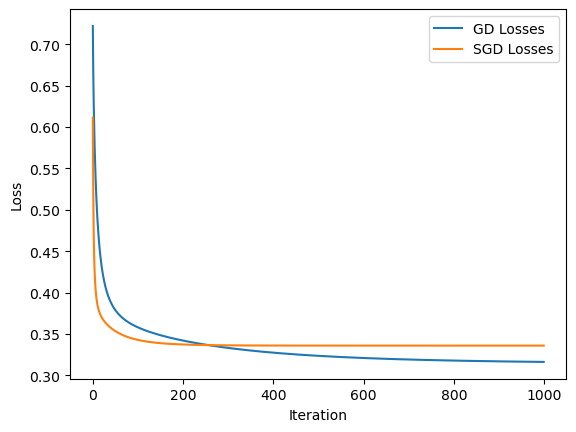

In [5]:
print(f"Time taken for GD: {gd_duration:.2f} seconds")
print(f"Time taken for SGD: {sgd_duration:.2f} seconds")

y_pred_class = (sigmoid(np.dot(X, w)) > 0.5).astype(int)
print("F1 Score:", f1_score(y, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_class))

plt.plot(gd_losses, label="GD Losses")
plt.plot(sgd_losses, label="SGD Losses")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [6]:
y_raw = data[:, -1].astype(int)

n_values = np.max(y_raw) + 1
y = np.eye(n_values)[y_raw]

W = np.array([0.1, 0.1, 0.1] * n_values).reshape(n_values, X.shape[1])

In [7]:
# Softmax function
def softmax(X):
    exps = np.exp(X - np.max(X))
    return exps / exps.sum(axis=1, keepdims=True)

def binary_cross_entropy(y, y_pred):
    return -np.mean(np.sum(y * np.log(y_pred), axis=1))

def compute_gradient(X, y, y_pred):
    return np.dot((y_pred - y).T, X) / X.shape[0]

In [8]:
# GD with softmax
gd_losses = []
gd_f1_scores = []
start_time = time.time()
for i in range(1000):
    scores = np.dot(X, W.T)
    y_pred = softmax(scores)
    gd_losses.append(binary_cross_entropy(y, y_pred))
    gradient = compute_gradient(X, y, y_pred)
    W -= 0.1 * gradient
    y_pred_class = np.argmax(y_pred, axis=1)
    gd_f1_scores.append(f1_score(y_raw, y_pred_class, average='macro'))
gd_duration = time.time() - start_time

# SGD with softmax
W = np.array([0.1, 0.1, 0.1] * n_values).reshape(n_values, X.shape[1])
sgd_losses = []
sgd_f1_scores = []
start_time = time.time()
for i in range(1000):
    for j in range(0, len(X), 2):
        X_batch = X[j:j+2]
        y_batch = y[j:j+2]
        scores = np.dot(X_batch, W.T)
        y_pred = softmax(scores)
        gradient = compute_gradient(X_batch, y_batch, y_pred)
        W -= 0.1 * gradient
    scores_full = np.dot(X, W.T)
    y_pred_full = softmax(scores_full)
    sgd_losses.append(binary_cross_entropy(y, y_pred_full))
    y_pred_class = np.argmax(y_pred_full, axis=1)
    sgd_f1_scores.append(f1_score(y_raw, y_pred_class, average='macro'))
sgd_duration = time.time() - start_time

Time taken for GD: 0.27 seconds
Time taken for SGD: 0.32 seconds
F1 Score: 0.8901098901098901
Confusion Matrix:
[[3 1]
 [0 6]]


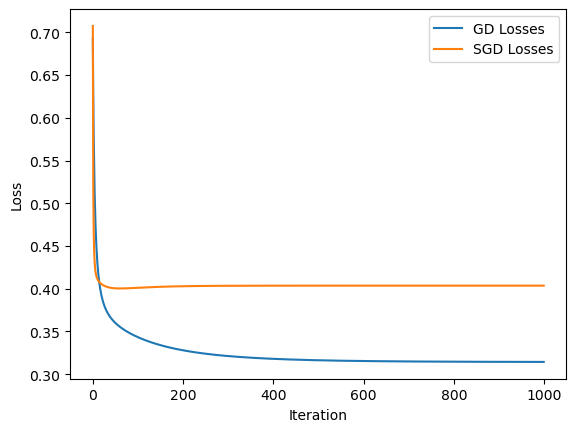

In [9]:
print(f"Time taken for GD: {gd_duration:.2f} seconds")
print(f"Time taken for SGD: {sgd_duration:.2f} seconds")

y_pred_class = np.argmax(softmax(np.dot(X, W.T)), axis=1)
print("F1 Score:", f1_score(y_raw, y_pred_class, average='macro'))
print("Confusion Matrix:")
print(confusion_matrix(y_raw, y_pred_class))

plt.plot(gd_losses, label="GD Losses")
plt.plot(sgd_losses, label="SGD Losses")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()